In [22]:
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML
df=pd.read_csv("G:\ITMD 525 Assignments\ITMD_525_HW5_Twinkle\JobsClassification.csv")
df.head(10)

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
5,6,2,Administrative Support,6,Admin Support II,2,1,1,1,1,1,2,3,PG02
6,7,2,Administrative Support,7,Admin Support III,3,1,2,1,2,1,3,3,PG03
7,8,2,Administrative Support,8,Administrative Support IV,4,4,0,1,2,1,3,5,PG04
8,9,2,Administrative Support,9,Administrative Support V,5,4,0,4,3,5,7,7,PG05
9,10,3,Baker,10,Baker I,4,2,0,1,4,1,1,2,PG04


In [17]:
df.isnull().sum()

ID                      0
JobFamily               0
JobFamilyDescription    0
JobClass                0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

In [23]:
df=df.drop('ID',1)
df

,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,15,Systems Analyst,62,Systems Analyst I,3,1,1,1,2,1,1,1,PG03
62,15,Systems Analyst,63,Systems Analyst II,5,4,1,3,3,4,3,4,PG05
63,15,Systems Analyst,64,Systems Analyst III,6,5,2,4,4,5,7,5,PG06
64,15,Systems Analyst,65,Systems Analyst IV,8,5,5,6,5,6,7,7,PG08


In [24]:
df=df.copy(deep=True)
df['JobFamily'] = pd.cut(df['JobFamily'],2)
df['JobClass'] = pd.cut(df['JobClass'],3)
df['PayGrade'] = pd.cut(df['PayGrade'],3)
df['EducationLevel'] = pd.cut(df['EducationLevel'],3)
df['Experience'] = pd.cut(df['Experience'],3)
df['OrgImpact'] = pd.cut(df['OrgImpact'],3)
df['ProblemSolving'] = pd.cut(df['ProblemSolving'],3)
df['Supervision'] = pd.cut(df['Supervision'],3)
df['ContactLevel'] = pd.cut(df['ContactLevel'],3)
df['FinancialBudget'] = pd.cut(df['FinancialBudget'],3)
display('Data Example',HTML(df.head(5).to_html()))

'Data Example'

,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,"(0.986, 8.0]",Accounting And Finance,"(0.935, 22.667]",Accountant I,"(4.0, 7.0]","(2.667, 4.333]","(-0.01, 3.333]","(2.667, 4.333]","(2.667, 4.333]","(3.0, 5.0]","(0.993, 3.333]","(4.333, 7.667]",PG05
1,"(0.986, 8.0]",Accounting And Finance,"(0.935, 22.667]",Accountant II,"(4.0, 7.0]","(2.667, 4.333]","(-0.01, 3.333]","(4.333, 6.0]","(2.667, 4.333]","(3.0, 5.0]","(5.667, 8.0]","(4.333, 7.667]",PG06
2,"(0.986, 8.0]",Accounting And Finance,"(0.935, 22.667]",Accountant III,"(7.0, 10.0]","(2.667, 4.333]","(-0.01, 3.333]","(4.333, 6.0]","(4.333, 6.0]","(5.0, 7.0]","(5.667, 8.0]","(7.667, 11.0]",PG08
3,"(0.986, 8.0]",Accounting And Finance,"(0.935, 22.667]",Accountant IV,"(7.0, 10.0]","(4.333, 6.0]","(3.333, 6.667]","(4.333, 6.0]","(4.333, 6.0]","(5.0, 7.0]","(5.667, 8.0]","(7.667, 11.0]",PG10
4,"(0.986, 8.0]",Administrative Support,"(0.935, 22.667]",Admin Support I,"(0.991, 4.0]","(0.995, 2.667]","(-0.01, 3.333]","(0.995, 2.667]","(0.995, 2.667]","(0.994, 3.0]","(0.993, 3.333]","(0.99, 4.333]",PG01


In [11]:

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt 

In [29]:
df['JobFamily'] = 'JobFamily=' + df['JobFamily'].astype(str)
df['JobClass'] =  'JobClass=' + df['JobClass'].astype(str)
df['PayGrade'] =  'PayGrade=' + df['PayGrade'].astype(str)
df['EducationLevel'] =  'EducationLevel=' + df['EducationLevel'].astype(str)
df['JobFamilyDescription'] = 'JobFamilyDescription=' +  df['JobFamilyDescription'].astype(str)
df['Experience'] =  'Experience=' + df['Experience'].astype(str)
df['JobFamilyDescription'] =  'JobFamilyDescription=' + df['JobFamilyDescription'].astype(str)
df['JobClassDescription'] =  'JobClassDescription=' + df['JobClassDescription'].astype(str)
df['ProblemSolving'] =  'ProblemSolving=' + df['ProblemSolving'].astype(str)
df['Supervision'] =  'Supervision=' + df['Supervision'].astype(str)
df['OrgImpact'] =  'OrgImpact=' + df['OrgImpact'].astype(str)
df['ContactLevel'] =  'ContactLevel=' + df['ContactLevel'].astype(str)
df['FinancialBudget'] =  'FinancialBudget=' + df['FinancialBudget'].astype(str)
df['PG'] =  'PG=' + df['PG'].astype(str)
print(df.dtypes)

#convert data frame to lists
df_arr = df.stack().groupby(level=0).apply(list).tolist()

# Encode lists to transactions
te = TransactionEncoder()
df_transactions = te.fit_transform(df_arr)
# covnert the values to booleans: TRUE and FALSE
df_rules = pd.DataFrame(df_transactions,columns=te.columns_)
display('Data Example',HTML(df_rules.head(5).to_html()))

# API, http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
frequent_itemsets = apriori(df_rules, min_support=0.45, use_colnames=True)
# API, http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
display('Rules',HTML(rules.to_html()))




JobFamily               object
JobFamilyDescription    object
JobClass                object
JobClassDescription     object
PayGrade                object
EducationLevel          object
Experience              object
OrgImpact               object
ProblemSolving          object
Supervision             object
ContactLevel            object
FinancialBudget         object
PG                      object
dtype: object


'Data Example'

,"ContactLevel=ContactLevel=ContactLevel=ContactLevel=ContactLevel=(0.993, 3.333]","ContactLevel=ContactLevel=ContactLevel=ContactLevel=ContactLevel=(3.333, 5.667]","ContactLevel=ContactLevel=ContactLevel=ContactLevel=ContactLevel=(5.667, 8.0]","EducationLevel=EducationLevel=EducationLevel=EducationLevel=EducationLevel=(0.995, 2.667]","EducationLevel=EducationLevel=EducationLevel=EducationLevel=EducationLevel=(2.667, 4.333]","EducationLevel=EducationLevel=EducationLevel=EducationLevel=EducationLevel=(4.333, 6.0]","Experience=Experience=Experience=Experience=Experience=(-0.01, 3.333]","Experience=Experience=Experience=Experience=Experience=(3.333, 6.667]","Experience=Experience=Experience=Experience=Experience=(6.667, 10.0]","FinancialBudget=FinancialBudget=FinancialBudget=FinancialBudget=FinancialBudget=(0.99, 4.333]","FinancialBudget=FinancialBudget=FinancialBudget=FinancialBudget=FinancialBudget=(4.333, 7.667]","FinancialBudget=FinancialBudget=FinancialBudget=FinancialBudget=FinancialBudget=(7.667, 11.0]","JobClass=JobClass=JobClass=JobClass=JobClass=(0.935, 22.667]","JobClass=JobClass=JobClass=JobClass=JobClass=(22.667, 44.333]","JobClass=JobClass=JobClass=JobClass=JobClass=(44.333, 66.0]",JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Accountant I,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Accountant II,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Accountant III,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Accountant IV,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Admin Support I,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Admin Support II,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Admin Support III,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Administrative Support IV,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Administrative Support V,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Baker I,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Baker II,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Baker III,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Buyer II,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Buyer III,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Buyer IV,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Cashier I,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Cashier II,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Cashier III,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Communications I,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Communications II,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Communications III,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Data Scientist,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Facilities I,JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=JobClassDescription=Facilities II,JobClassDescription=JobClassDescription=JobCla

'Rules'

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(FinancialBudget=FinancialBudget=FinancialBudget=FinancialBudget=FinancialBudget=(0.99, 4.333])","(Experience=Experience=Experience=Experience=Experience=(-0.01, 3.333])",0.484848,0.833333,0.484848,1.000000,1.200000,0.080808,inf
1,"(JobFamily=JobFamily=JobFamily=JobFamily=JobFamily=(0.986, 8.0])","(Experience=Experience=Experience=Experience=Experience=(-0.01, 3.333])",0.621212,0.833333,0.560606,0.902439,1.082927,0.042929,1.708333
2,"(OrgImpact=OrgImpact=OrgImpact=OrgImpact=OrgImpact=(2.667, 4.333])","(Experience=Experience=Experience=Experience=Experience=(-0.01, 3.333])",0.484848,0.833333,0.469697,0.968750,1.162500,0.065657,5.333333
3,"(ProblemSolving=ProblemSolving=ProblemSolving=ProblemSolving=ProblemSolving=(2.667, 4.333])","(Experience=Experience=Experience=Experience=Experience=(-0.01, 3.333])",0.469697,0.833333,0.469697,1.000000,1.200000,0.078283,inf


In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
df=pd.read_csv("G:\ITMD 525 Assignments\ITMD_525_HW5_Twinkle\JobsClassification.csv")
df.head(10)
df_raw=df.copy(deep=True) 
df_knn=df.copy(deep=True) 
df_dummies=pd.get_dummies(df_knn[['JobFamilyDescription','JobClassDescription']])
df_knn=df_knn.join(df_dummies)
# drop original columns
df_knn=df_knn.drop('JobFamilyDescription',axis=1)
df_knn=df_knn.drop('JobClassDescription', axis=1)
display(HTML(df_knn.head(10).to_html()))

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_knn.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    
for col in cols_numeric:
    df_knn[col]=(df_knn[col]-df_knn[col].min())/(df_knn[col].max()-df_knn[col].min())

display(HTML(df_knn.head(10).to_html()))
df_knn=df_knn.drop("PG",1)
display(HTML(df_knn.head(10).to_html()))

,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V
0,1,1,1,5,3,1,3,3,4,3,5,PG05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,2,6,4,1,5,4,5,7,7,PG06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,8,4,2,6,5,6,7,10,PG08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,4,10,5,5,6,6,7,8,11,PG10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,5,1,1,0,1,1,1,1,1,PG01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Selected numerical columns:
 ['ID', 'JobFamily', 'JobClass', 'PayGrade', 'EducationLevel', 'Experience', 'OrgImpact', 'ProblemSolving', 'Supervision', 'ContactLevel', 'FinancialBudget']


,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V
0,0.000000,0.000000,0.000000,0.444444,0.4,0.1,0.4,0.4,0.500000,0.285714,0.4,PG05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.015385,0.000000,0.015385,0.555556,0.6,0.1,0.8,0.6,0.666667,0.857143,0.6,PG06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.030769,0.000000,0.030769,0.777778,0.6,0.2,1.0,0.8,0.833333,0.857143,0.9,PG08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.046154,0.000000,0.046154,1.000000,0.8,0.5,1.0,1.0,1.000000,1.000000,1.0,PG10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V
0,0.000000,0.000000,0.000000,0.444444,0.4,0.1,0.4,0.4,0.500000,0.285714,0.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.015385,0.000000,0.015385,0.555556,0.6,0.1,0.8,0.6,0.666667,0.857143,0.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.030769,0.000000,0.030769,0.777778,0.6,0.2,1.0,0.8,0.833333,0.857143,0.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.046154,0.000000,0.046154,1.000000,0.8,0.5,1.0,1.0,1.000000,1.000000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0615

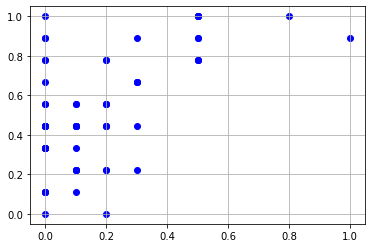

outlier indices:  (array([], dtype=int64),)


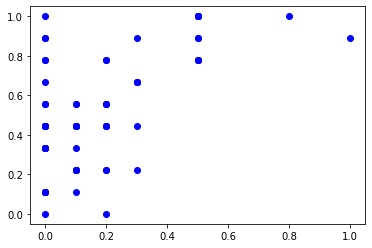

In [44]:
plt.scatter(df_knn["Experience"], df_knn["PayGrade"], color = "b")
plt.grid()
plt.show()

# model specification
model1 = LocalOutlierFactor(n_neighbors = 5, metric = "euclidean")
# model fitting
y_pred = model1.fit_predict(df_knn)
# filter outlier index
outlier_index = np.where(y_pred == -1) # negative values are outliers 
print("outlier indices: ", outlier_index)
# filter outlier values
outlier_values = df_knn.iloc[outlier_index]
# plot data
plt.scatter(df_knn["Experience"], df_knn["PayGrade"], color = "b")



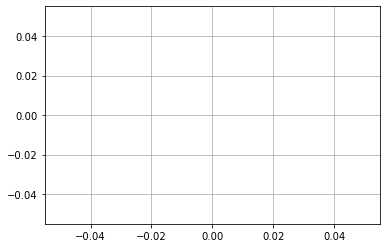

In [40]:
# plot outlier values
plt.scatter(outlier_values["Experience"], outlier_values["PayGrade"], color = "r")
plt.grid()
plt.show()

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from IPython.display import display, HTML

df=pd.read_csv("G:\ITMD 525 Assignments\ITMD_525_HW5_Twinkle\JobsClassification.csv")
df.head(10)

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
5,6,2,Administrative Support,6,Admin Support II,2,1,1,1,1,1,2,3,PG02
6,7,2,Administrative Support,7,Admin Support III,3,1,2,1,2,1,3,3,PG03
7,8,2,Administrative Support,8,Administrative Support IV,4,4,0,1,2,1,3,5,PG04
8,9,2,Administrative Support,9,Administrative Support V,5,4,0,4,3,5,7,7,PG05
9,10,3,Baker,10,Baker I,4,2,0,1,4,1,1,2,PG04


In [63]:
df=df.drop('ID',1)
df=df.drop('PG',1)
display(HTML(df.head(10).to_html()))

,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
0,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5
1,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7
2,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10
3,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11
4,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1
5,2,Administrative Support,6,Admin Support II,2,1,1,1,1,1,2,3
6,2,Administrative Support,7,Admin Support III,3,1,2,1,2,1,3,3
7,2,Administrative Support,8,Administrative Support IV,4,4,0,1,2,1,3,5
8,2,Administrative Support,9,Administrative Support V,5,4,0,4,3,5,7,7
9,3,Baker,10,Baker I,4,2,0,1,4,1,1,2


In [64]:
df_raw=df.copy(deep=True) 
df=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df[['JobFamilyDescription','JobClassDescription']])
# add them to dataframe
df=df.join(df_dummies)
# drop original columns
df=df.drop('JobFamilyDescription',axis=1)
df=df.drop('JobClassDescription', axis=1)

display('Data Example:',HTML(df.head(10).to_html()))

'Data Example:'

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V
0,1,1,5,3,1,3,3,4,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,6,4,1,5,4,5,7,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,8,4,2,6,5,6,7,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,10,5,5,6,6,7,8,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,5,1,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,6,2,1,1,1,1,1,2,3,0,1,0,0,0,0,0,0,0,

In [65]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())

Selected numerical columns:
 ['JobFamily', 'JobClass', 'PayGrade', 'EducationLevel', 'Experience', 'OrgImpact', 'ProblemSolving', 'Supervision', 'ContactLevel', 'FinancialBudget']


In [66]:
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans


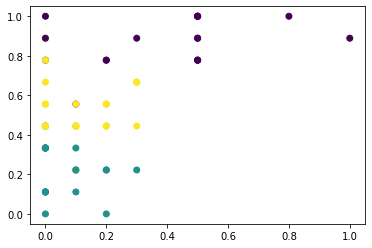

In [68]:
kmeans=KMeans(n_clusters=3, random_state=1)
kmeans.fit(df)
y_pred=kmeans.predict(df)

plt.scatter(df['Experience'],df['PayGrade'],c=y_pred,cmap='viridis')

'Data:'

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_Accounting And Finance,JobFamilyDescription_Administrative Support,JobFamilyDescription_Baker,JobFamilyDescription_Buildings And Facilities,JobFamilyDescription_Buyer,JobFamilyDescription_Cashier,JobFamilyDescription_Communications And Media,JobFamilyDescription_Corporate Research,JobFamilyDescription_Finance And Accounting,JobFamilyDescription_Human Resources,JobFamilyDescription_Meat Cutter,JobFamilyDescription_Produce,JobFamilyDescription_Secretary,JobFamilyDescription_Stockkeeping,JobFamilyDescription_Systems Analyst,JobClassDescription_Accountant I,JobClassDescription_Accountant II,JobClassDescription_Accountant III,JobClassDescription_Accountant IV,JobClassDescription_Admin Support I,JobClassDescription_Admin Support II,JobClassDescription_Admin Support III,JobClassDescription_Administrative Support IV,JobClassDescription_Administrative Support V,JobClassDescription_Baker I,JobClassDescription_Baker II,JobClassDescription_Baker III,JobClassDescription_Buyer II,JobClassDescription_Buyer III,JobClassDescription_Buyer IV,JobClassDescription_Cashier I,JobClassDescription_Cashier II,JobClassDescription_Cashier III,JobClassDescription_Communications I,JobClassDescription_Communications II,JobClassDescription_Communications III,JobClassDescription_Data Scientist,JobClassDescription_Facilities I,JobClassDescription_Facilities II,JobClassDescription_Facilities III,JobClassDescription_Facilities IV,JobClassDescription_Financial Officer I,JobClassDescription_Financial Officer II,JobClassDescription_Financial Officer III,JobClassDescription_Human Resources I,JobClassDescription_Human Resources II,JobClassDescription_Human Resources III,JobClassDescription_Maintenance Services I,JobClassDescription_Maintenance Services II,JobClassDescription_Maintenance Services III,JobClassDescription_Maintenance Services IV,JobClassDescription_Meat Cutter I,JobClassDescription_Meat Cutter II,JobClassDescription_Meat Cutter III,JobClassDescription_Meat Cutter IV,JobClassDescription_Photographer I,JobClassDescription_Photographer II,JobClassDescription_Photographer III,JobClassDescription_Photographer IV,JobClassDescription_Printing II,JobClassDescription_Printing III,JobClassDescription_Printing IV,JobClassDescription_Produce I,JobClassDescription_Produce II,JobClassDescription_Produce III,JobClassDescription_Produce IV,JobClassDescription_Produce V,JobClassDescription_Research Analyst I,JobClassDescription_Research Analyst II,JobClassDescription_Research Analyst IV,JobClassDescription_Research Analyst Iii,JobClassDescription_Secretary II,JobClassDescription_Secretary III,JobClassDescription_StockKeeper I,JobClassDescription_StockKeeper II,JobClassDescription_StockKeeper III,JobClassDescription_Systems Analyst I,JobClassDescription_Systems Analyst II,JobClassDescription_Systems Analyst III,JobClassDescription_Systems Analyst IV,JobClassDescription_Systems Analyst V,Cluster
56,0.857143,0.861538,0.222222,0.0,0.2,0.4,0.2,0.000000,0.142857,0.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
57,0.857143,0.876923,0.444444,0.2,0.3,0.4,0.4,0.500000,0.285714,0.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
58,0.928571,0.892308,0.333333,0.4,0.0,0.0,0.2,0.000000,0.285714,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
59,0.928571,0.907692,0.444444,0.4,0.0,0.4,0.4,0.000000,0.857143,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
60,0.928571,0.923077,0.7777

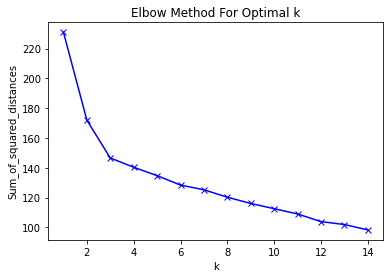

In [69]:
opt=kmeans.labels_
df['Cluster']=opt
display('Data:',HTML(df.tail(10).to_html()))
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot K and SSE, observe which one is better
# In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()